In [2]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import github as gh
sns.set()
%matplotlib inline

In [3]:
g = gh.Github("<token>")

In [4]:
repos = g.get_organization("keycloak").get_repos()

In [5]:
df = pd.DataFrame(columns=["Repo", "Pull Request ID", "Pull Request Title", "Author", "Created At", "Number of review comments", "Assignee"])

In [6]:
for r in repos:
    for index, p in enumerate(r.get_pulls(state='open', sort='created', base='master')):
        df.loc[index] = [r.full_name, p.number, p.title, p.user.login, p.created_at, len(list(p.get_comments())), "None" if p.assignee is None else p.assignee.login]

In [7]:
df["Created At"]=pd.to_datetime(df["Created At"])
df['tmp'] = pd.to_datetime(df["Created At"]).dt.date
df['In the queue'] = abs((df['tmp'] - pd.datetime.now().date()).dt.days)
df.drop(columns=['tmp'])
df

,Repo,Pull Request ID,Pull Request Title,Author,Created At,Number of review comments,Assignee,tmp,In the queue
0,keycloak/keycloak-operator,108,KEYCLOAK-12273 Keycloak Operator documentation,slaskawi,2019-12-06 07:33:26,0,abstractj,2019-12-06,94
1,keycloak/keycloak-operator,122,Extra volumes,pb82,2020-01-17 15:09:37,9,stianst,2020-01-17,52
2,keycloak/keycloak-operator,130,KEYCLOAK-12409: allow image overrides,JiyeYu,2020-02-03 07:14:14,10,None,2020-02-03,35
3,keycloak/keycloak-operator,139,KEYCLOAK-12983: Make Ingress Definition Config...,roberth1988,2020-02-12 16:16:00,2,None,2020-02-12,26
4,keycloak/keycloak-operator,140,KEYCLOAK-12787: Fix external Database Support,roberth1988,2020-02-12 16:29:33,0,None,2020-02-12,26
...,...,...,...,...,...,...,...,...,...
60,keycloak/keycloak,6875,KEYCLOAK-13246 Update Italian translations,axl8713,2020-03-06 16:09:26,0,None,2020-03-06,3
61,keycloak/keycloak,6876,KEYCLOAK-13253 read rpId from policy in WebAut...,phy25,2020-03-07 04:51:02,0,None,2020-03-07,2
62,keycloak/keycloak,6877,Update user-credentials.html,carlosen14,2020-03-07 18:39:46,0,None,2020-03-07,2
63,keycloak/keycloak,6879,"KEYCLOAK-13260 Fix ""Test authentication"" butto...",vmuzikar,2020-03-09 11:21:04,0,None,2020-03-09,0


In [8]:
df.describe()

,Pull Request ID,Number of review comments,In the queue
count,65.000000,65.000000,65.000000
mean,4588.523077,1.430769,16.692308
std,3047.078278,3.191636,15.984292
min,108.000000,0.000000,0.000000
25%,859.000000,0.000000,5.000000
50%,6765.000000,0.000000,13.000000
75%,6853.000000,1.000000,26.000000
max,6880.000000,15.000000,94.000000


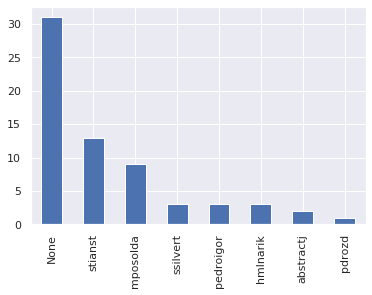

In [9]:
df["Assignee"].value_counts().plot(kind="bar")

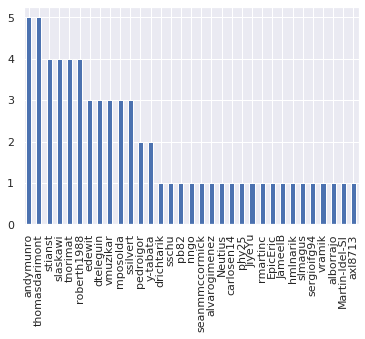

In [10]:
df["Author"].value_counts().plot(kind="bar")

In [11]:
df.Author.value_counts() == 1

# mask = df.Author-01-01'

# df.Author.value_counts() == 1
# mask

andymunro         False
thomasdarimont    False
stianst           False
slaskawi          False
tnorimat          False
roberth1988       False
edewit            False
dteleguin         False
vmuzikar          False
mposolda          False
ssilvert          False
pedroigor         False
y-tabata          False
drichtarik         True
sschu              True
pb82               True
nngo               True
seanmmccormick     True
alvarogimenez      True
Neutius            True
carlosen14         True
phy25              True
JiyeYu             True
rmartinc           True
EpicEric           True
JameelB            True
hmlnarik           True
slmagus            True
sergioifg94        True
vramik             True
alborrajo          True
Martin-Idel-SI     True
axl8713            True
Name: Author, dtype: bool

/usr/lib64/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


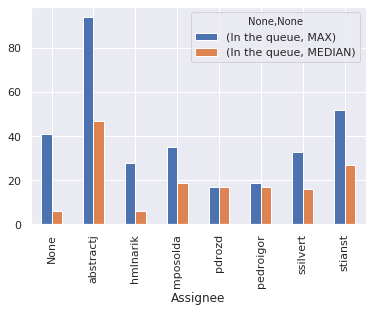

In [12]:
aggregation={
         "In the queue":
    {
#         "MIN": lambda x: x.min(skipna=True),
        "MAX":lambda x: x.max(skipna=True),
        "MEDIAN":lambda x:x.median(skipna=True)
    }
}
df[['Assignee', "In the queue"]].groupby(['Assignee']).agg(aggregation).plot(kind="bar")

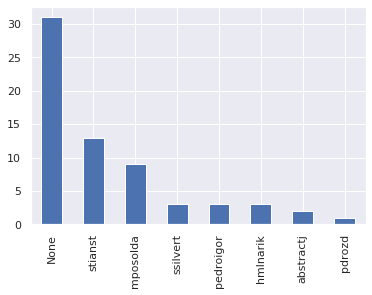

In [13]:
df["Assignee"].value_counts().plot(kind="bar")

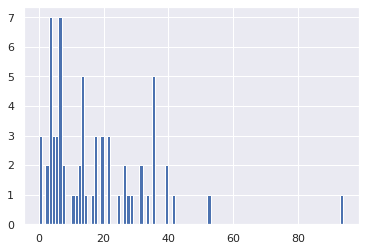

In [14]:
buckets = df["In the queue"].max()
df["In the queue"].hist(bins=buckets)